## Problem Statement 

A bike-sharing system is a service in which bikes are made available for shared use to
individuals on a short term basis for a price or free. Many bike share systems allow
people to borrow a bike from a "dock" which is usually computer-controlled wherein the
user enters the payment information, and the system unlocks it. This bike can then be
returned to another dock belonging to the same system.


#### Business Goal:
You are required to model the demand for shared bikes with the available independent
variables. It will be used by the management to understand how exactly the demands
vary with different features. They can accordingly manipulate the business strategy to
meet the demand levels and meet the customer's expectations. Further, the model will be
a good way for management to understand the demand dynamics of a new market.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# setting up plot style 
style.use('seaborn-poster')

In [2]:
bike = pd.read_csv('day.csv')

In [3]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.shape

(730, 16)

Dataset has 730 rows and 16 columns.

Except one column, all other are either float or integer type.

there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

In [7]:
# seperating the null percentage DT from  orginal
bike_null_dt = pd.DataFrame((bike.isnull().sum())*100/bike.shape[0]).reset_index()
bike_null_dt.columns = ['Column Name', 'Null Values Percentage']
bike_null_dt

,Column Name,Null Values Percentage
0,instant,0.0
1,dteday,0.0
2,season,0.0
3,yr,0.0
4,mnth,0.0
5,holiday,0.0
6,weekday,0.0
7,workingday,0.0
8,weathersit,0.0
9,temp,0.0


     --> There is No Null value exist in the dataset

#### Checking the Duplication in the dataset

In [8]:
bike_duplicate_dt = bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_duplicate_dt.drop_duplicates(subset=None, inplace=True)

In [9]:
print("Shape of Dataset after removing the duplicate : ",bike_duplicate_dt.shape)
print("Shape of orginal Dataset                      : ",bike.shape)

Shape of Dataset after removing the duplicate :  (730, 16)
Shape of orginal Dataset                      :  (730, 16)


    --> It looks the dataset doesn't have any duplicate dataset

#### Data Cleaning 

In [10]:
for col in bike.iloc[:,1:16]:
    print(bike[col].value_counts(ascending=False), '\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 

3    188
2    184
1    180
4    178
Name: season, dtype: int64 

0    365
1    365
Name: yr, dtype: int64 

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 

0    709
1     21
Name: holiday, dtype: int64 

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 

1    499
0    231
Name: workingday, dtype: int64 

1    463
2    246
3     21
Name: weathersit, dtype: int64 

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 

32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           .

In [11]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Removing the unwanted colomns

The following colomns can be removed based on the observation on the dataset

    instant : it's contain index value
    dteday : though we have month,year colomn, we may remove this colomn
    casual, register : It's contain the count of bike booked by different categories of customer. since our object to identify count of bikes not on category

In [12]:
bike_cleaned_dt=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]
bike_cleaned_dt.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
def mapping_weekday_col(x):
    return x.map({0:"Monday", 
                  1:"Tuesday", 
                  2:"Wednesday", 
                  3:"Thursday",
                  4:"Friday",
                  5:"Saturday",
                  6:"Sunday"})


In [14]:
# Convert to 'category' data type

bike_cleaned_dt['season']=bike_cleaned_dt['season'].astype('category')
bike_cleaned_dt['weathersit']=bike_cleaned_dt['weathersit'].astype('category')
bike_cleaned_dt['mnth']=bike_cleaned_dt['mnth'].astype('category')
# Applying the function to the weekday column
bike_cleaned_dt[["weekday"]] = bike_cleaned_dt[["weekday"]].apply(mapping_weekday_col)
bike_cleaned_dt.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    object  
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(4), object(1)
memory usage: 54.3+ KB


In [15]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_cleaned_dt = pd.get_dummies(bike_cleaned_dt, drop_first=True)
bike_cleaned_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   atemp              730 non-null    float64
 5   hum                730 non-null    float64
 6   windspeed          730 non-null    float64
 7   cnt                730 non-null    int64  
 8   season_2           730 non-null    uint8  
 9   season_3           730 non-null    uint8  
 10  season_4           730 non-null    uint8  
 11  mnth_2             730 non-null    uint8  
 12  mnth_3             730 non-null    uint8  
 13  mnth_4             730 non-null    uint8  
 14  mnth_5             730 non-null    uint8  
 15  mnth_6             730 non-null    uint8  
 16  mnth_7             730 non

In [16]:
bike_cleaned_dt.shape

(730, 30)

#### Visualize the categorical Variable

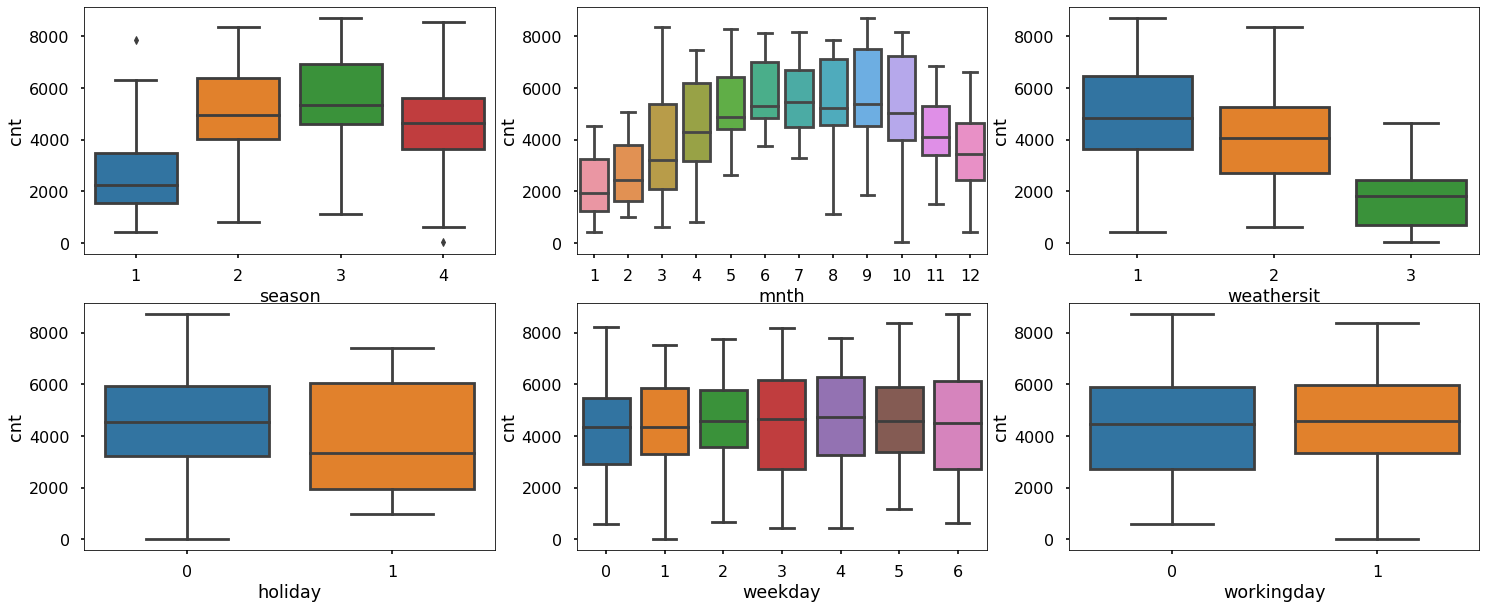

In [17]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

#### Insights:

    Observation based on the above box plot
    
    Season:  more number of bike booking on the season 3 and follwed by season 2 and Season 4. This indicate that godd indicator for predictor
    
    mnth: More number of bike booking on the months of 5,6,7,8,9 in the median of above 5000. This indicate that good indicator for prdiction
    weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking and followed by weathersit 2 and the weathersit3. This indicate that good indicator for prediction.
    Holiday: Most of the booking happe on the weekdays (indicate that biased). This variable cannot be good for prediction.
    
    weekday: weekday variable shows very close trend (all days of the week) having their independent medians between 4000 to 5000 bookings. Model will decide wheather good or bad for prediction.
    
    workingday: Almost bike booking were happening in workingday with a median of close to 5000 booking. This indicates, workingday can be a good predictor for the dependent variable
    

#### Correlation Matrix

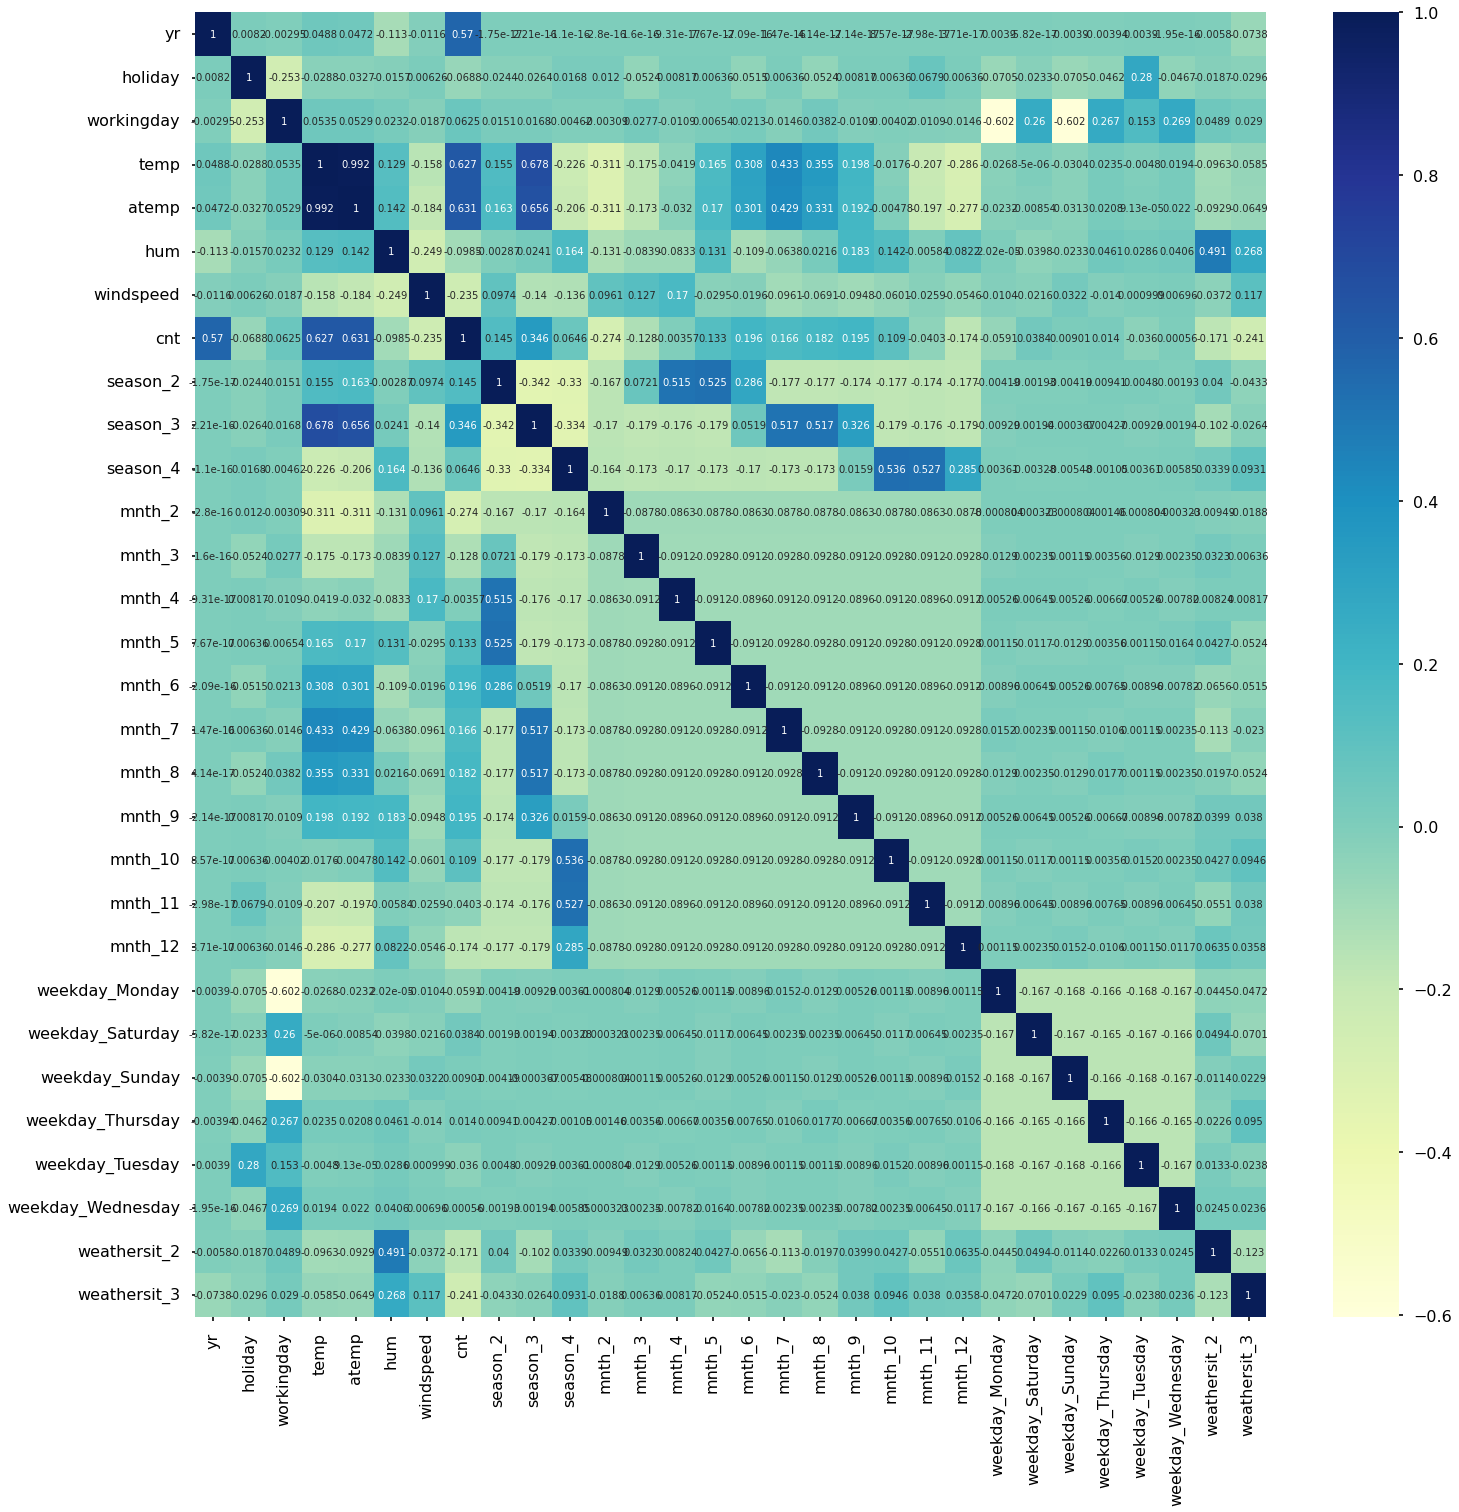

In [18]:
plt.figure(figsize = (24, 24))
sns.heatmap(bike_cleaned_dt.corr(), annot = True, fmt='0.3g', cmap="YlGnBu")
plt.show()

#### Spliting the Dataset after the dummy created

In [19]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
bike_df_train, bike_df_test = train_test_split(bike_cleaned_dt, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Visualising Numeric Variables

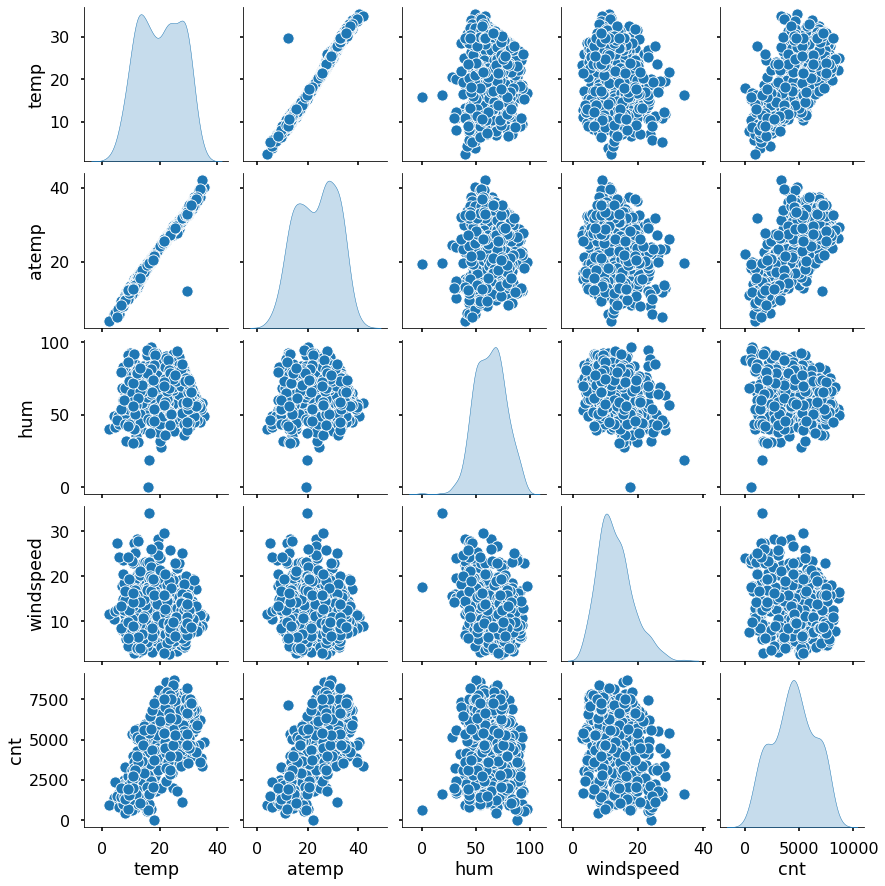

In [20]:

bike_numerical_dt=bike_df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_numerical_dt, diag_kind='kde')
plt.show()

From the above graph there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

#### Rescaling Features


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [22]:
num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

bike_df_train[num_vars] = scaler.fit_transform(bike_df_train[num_vars])

In [23]:
bike_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,1,0,0,0,1,0


In [24]:
y_train = bike_df_train.pop('cnt')
X_train = bike_df_train ## assigning all feature variables to X_train

#### Building our model


In [25]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [26]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=18,step=1) # running RFE
rfe = rfe.fit(X_train, y_train)

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 4),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 5),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 6),
 ('mnth_12', False, 7),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', False, 11),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 12),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 10),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [28]:
col = X_train.columns[rfe.support_] ## variables suggested by RFE
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_8',
       'mnth_9', 'mnth_10', 'weekday_Sunday', 'weathersit_2', 'weathersit_3'],
      dtype='object')

#### Creating a model using statsmodel for precise statistics.

In [29]:
# Calculate the VIFs for the new model
def calculate_VIF(col,X_train):
    vif = pd.DataFrame()
    vif['Features'] = col
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

In [30]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [31]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [32]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the 1st linear model


In [33]:
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.7
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          1.30e-189
Time:                        11:02:18   Log-Likelihood:                 523.80
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     491   BIC:                            -929.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1925      0.029      6.

In [34]:
calculate_VIF(col,X_train)

,Features,VIF
3,temp,25.37
4,hum,17.64
7,season_3,8.86
6,season_2,5.82
2,workingday,5.09
5,windspeed,4.13
8,season_4,3.14
11,mnth_5,2.30
10,mnth_4,2.26
16,weathersit_2,2.15


##### Model 2

In [35]:
X_train_new = X_train[col].drop(["holiday"], axis = 1) # dropping holiday variable
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train,X_train_lm).fit()   # Running the 2nd linear model
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     163.7
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          6.24e-190
Time:                        11:02:19   Log-Likelihood:                 521.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     492   BIC:                            -931.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1834      0.029      6.

In [36]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
2,temp,25.32
3,hum,17.17
6,season_3,8.84
5,season_2,5.81
1,workingday,4.60
4,windspeed,4.08
7,season_4,3.14
10,mnth_5,2.30
9,mnth_4,2.26
15,weathersit_2,2.14


#### Model 3

In [37]:
X_train_new = X_train_new.drop(["hum"], axis = 1) # dropping "hum" variable
X_train_lm = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train,X_train_lm).fit()   # Running the 3rd linear model
print(lm_3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     166.5
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          5.91e-187
Time:                        11:02:19   Log-Likelihood:                 512.06
No. Observations:                 510   AIC:                            -990.1
Df Residuals:                     493   BIC:                            -918.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0873      0.019      4.

In [38]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
2,temp,17.96
5,season_3,8.46
4,season_2,5.71
1,workingday,4.18
3,windspeed,3.89
6,season_4,3.01
9,mnth_5,2.29
8,mnth_4,2.26
0,yr,2.06
10,mnth_8,1.85


#### Model 4

In [39]:
X_train_new = X_train_new.drop(["season_3","season_2","mnth_10"], axis = 1) ## dropping season_3 and season_2 high P value
X_train_lm = sm.add_constant(X_train_new)
lm_4 = sm.OLS(y_train,X_train_lm).fit()   # Running the 3rd linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.5
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          8.75e-183
Time:                        11:02:19   Log-Likelihood:                 493.94
No. Observations:                 510   AIC:                            -959.9
Df Residuals:                     496   BIC:                            -900.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0719      0.019      3.

In [40]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
2,temp,5.87
1,workingday,4.13
3,windspeed,3.75
0,yr,2.03
10,weekday_Sunday,1.71
11,weathersit_2,1.54
4,season_4,1.52
8,mnth_8,1.52
7,mnth_5,1.32
5,mnth_3,1.29


       --> lm_4 look good for prediction
       --> All VIFs are now below 5
       --> All p-values less than 0.05

In [41]:
y_train_cnt = lm_4.predict(X_train_lm)

In [42]:
np.sqrt(mean_squared_error(y_train, y_train_cnt))

0.09186305096315968

Text(0.5, 0, 'Errors')

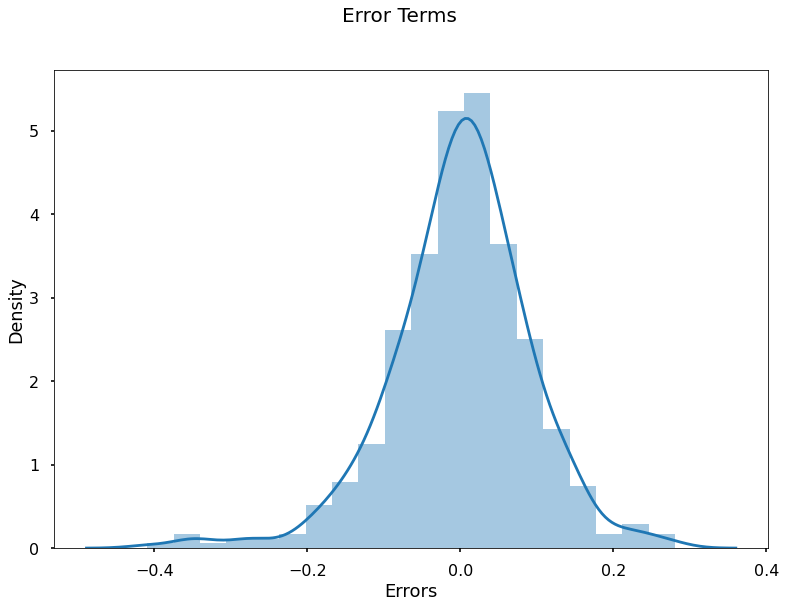

In [43]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

#### Train Prediction:

In [44]:
# RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_cnt))
rmse_train

0.09186305096315968

In [45]:
# R
r2_train=r2_score(y_train, y_train_cnt)
r2_train

0.8323732592328554

In [46]:
adj_R2_train = 1-(1-r2_train)*(219-1)/(219-12-1)
adj_R2_train

0.822608594722148

#### Making Predictions


In [47]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

bike_df_test[num_vars] = scaler.transform(bike_df_test[num_vars])

In [48]:
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test



# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [49]:
# Making predictions
y_pred = lm_4.predict(X_test_new)

Text(0, 0.5, 'y_pred')

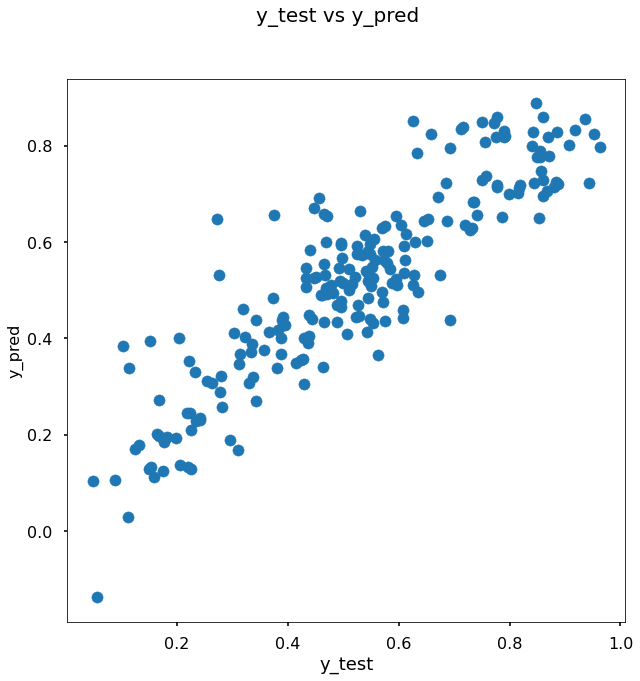

In [50]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize = (10,10))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

    RMSE

In [51]:
#Returns the mean squared error; we'll take a square root
rmse_test=np.sqrt(mean_squared_error(y_test, y_pred))
rmse_test

0.0997405536781218

In [52]:
r2_test=r2_score(y_test, y_pred)
r2_test

0.7905461884859212

In [53]:
adj_R2_test = 1-(1-r2_test)*(219-1)/(219-12-1)
adj_R2_test

0.7783449955821884

#### Conclusion

In [54]:
summary_df = pd.DataFrame({"Model Performance Metrics":["R-Squared Value","Adjusted R-Squared Value","RMSE"],
                         "Train Set":[r2_train,adj_R2_train,rmse_train],
                         "Test Set":[r2_test,adj_R2_test,rmse_test]})

In [55]:
summary_df

,Model Performance Metrics,Train Set,Test Set
0,R-Squared Value,0.832373,0.790546
1,Adjusted R-Squared Value,0.822609,0.778345
2,RMSE,0.091863,0.099741


Bike demand is determined by the year, holiday, temperature, windspeed, September, Light_snowrain, Misty, spring, summer, and winter seasons.